# Introduction


## Content-Based Image Retrieval (CBIR) Systems

Content-Based Image Retrieval (CBIR) systems represent a paradigm shift in image retrieval technology. Unlike traditional keyword-based searches, CBIR systems enable the retrieval of images based on visual content. These systems analyze the actual contents of the image such as color, shape, texture, and spatial layout, rather than relying on manually entered metadata or descriptions. This approach is particularly beneficial in fields where visual details are paramount, such as digital libraries, medical imaging, criminal investigation, and multimedia applications.

The fundamental idea behind CBIR is to enable users to find images that are visually similar to a query image. This process involves extracting features from images in a database, comparing these features with those of a query image, and then ranking the database images based on their similarity to the query. The effectiveness of a CBIR system largely depends on the accuracy and relevance of the extracted features.

## Importance of Color Features in CBIR

Among the various visual features used in CBIR, color is one of the most significant and widely utilized. The reasons for the prominence of color features in image retrieval are manifold:

1. **Perceptual Significance:** Color is a key attribute that the human visual system naturally uses to distinguish and recognize objects and scenes. Therefore, color-based retrieval often aligns well with human perception, making the retrieval process more intuitive and effective.

2. **Robustness and Invariance:** Color features are generally robust against background complexity and are less affected by changes in image size, orientation, and partial occlusion. This robustness makes color a reliable feature for image retrieval.

3. **Computational Efficiency:** Color features can be relatively easier and faster to compute compared to other complex features like texture or shape. This efficiency is crucial for handling large image databases and ensuring a responsive CBIR system.

4. **Complementary Nature:** Color features can be effectively combined with other features (like texture or shape) to enhance the retrieval performance. This complementary nature allows for the development of more sophisticated and accurate CBIR systems.

In this assignment, we will delve into the implementation of CBIR systems, focusing particularly on the role and effectiveness of color features. We will explore different methods of representing color in images, such as color histograms and color moments, and evaluate their impact on the retrieval performance of the CBIR system.

---

# Background Theory

In this section, we delve into the theoretical underpinnings of color feature extraction techniques commonly used in Content-Based Image Retrieval (CBIR) systems. Understanding these concepts is crucial for implementing an effective CBIR system.


## Color Histograms

A color histogram is a representation of the distribution of colors in an image. It is one of the simplest and most widely used methods for color feature extraction in image retrieval systems. A histogram divides the entire color space of an image into a finite number of bins and then counts the number of pixels that fall into each bin. The result is a graph or a vector that represents the frequency of each color in the image.

### Significance of Color Histograms:
- **Universality:** Color histograms are not specific to any particular type of image and can be applied universally across different domains.
- **Simplicity and Efficiency:** They are relatively simple to compute and can be efficiently used even in large-scale image databases.
- **Robustness:** Histograms are generally robust to minor changes in camera viewpoint, image scaling, and rotation.

However, color histograms have limitations, including insensitivity to spatial distribution of colors and potential loss of information due to binning.



## Color Moments

Color moments are statistical measures that provide a summary of the color distribution in an image. The first few moments (mean, standard deviation, and skewness) are often used to capture the essence of the color distribution.

### Importance of Color Moments:
- **Compact Representation:** Moments provide a more compact representation of color features compared to histograms.
- **Computational Efficiency:** They are computationally less intensive than histograms.
- **Sensitivity to Color Variations:** Moments can capture subtle variations in color distributions, which might be missed by histograms.

However, color moments may not capture the full complexity of color distributions in an image, especially in highly textured or multi-colored images.


## Application in CBIR

Both color histograms and color moments play pivotal roles in the development of CBIR systems. They offer a means to quantitatively describe the color characteristics of an image, which are crucial for similarity comparisons in retrieval tasks. By effectively utilizing these color features, a CBIR system can provide more accurate and perceptually relevant results.

In summary, understanding and effectively implementing these color feature extraction techniques is fundamental in building a robust and efficient CBIR system. In the following sections, we will explore how these concepts are applied in practice and analyze their effectiveness in real-world scenarios.

---

# System Architecture Overview

In this section, we outline the overall architecture of our Content-Based Image Retrieval (CBIR) system. The architecture is designed to be efficient, scalable, and effective in retrieving visually similar images based on color features.



## CBIR System Architecture

The architecture of our CBIR system can be divided into several key components:

1. **Image Database:** A collection of images that serves as the dataset for retrieval. This database can consist of various types of images, depending on the application domain.

2. **Feature Extraction Module:** This module is responsible for extracting relevant color features from each image in the database. It uses color histograms and color moments techniques to represent the color distribution and characteristics of the images.

3. **Feature Database:** Once extracted, the color features of each image are stored in a feature database. This database enables efficient matching and retrieval processes.

4. **Query Interface:** The user interacts with the system through a query interface, where they can submit a query image. The system then extracts color features from this query image using the same methods applied to the database images.

5. **Similarity Measurement and Retrieval:** The core of the system, this component compares the query image's features with those in the feature database. It uses similarity measures like Euclidean distance, cosine similarity, or other relevant metrics to determine the closeness of the features.

6. **Ranking and Result Display:** Based on the similarity scores, the system ranks the images in the database and displays the most similar images to the user.

7. **Feedback Mechanism (Optional):** Some CBIR systems include a feedback mechanism where users can provide input on the relevance of retrieved images, allowing the system to refine its retrieval process.

This architecture is designed to be modular, where each component can be independently developed and optimized. The use of color histograms and moments allows for a balance between computational efficiency and retrieval accuracy.

## Implementation Setup

In the following code cell, we import the necessary libraries and modules required for building our CBIR system.



In [6]:
# Importing necessary libraries
import cv2
import os
from scipy.spatial import distance
from scipy.spatial.distance import cosine
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, pairwise_distances
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import numpy as np
import time


In the upcoming sections, we will delve into the implementation details of each module, starting with the data loading and preprocessing.

---


# Data Loading and Preprocessing

In this section, we focus on the initial phase of our CBIR system - loading and preprocessing the images from the dataset. This stage is crucial as it sets the foundation for feature extraction and subsequent image retrieval processes.



## Introduction to the Dataset

For our CBIR system, we will use a dataset that is representative of the application domain we are targeting. The dataset could be a standard image dataset like CIFAR-10, ImageNet, or a specialized collection relevant to specific fields like medical imaging, art collections, or nature photography.

### Characteristics of the Dataset:
- **Diversity and Size:** The dataset should be diverse and sizable enough to test the effectiveness of our CBIR system under different scenarios.
- **Image Quality:** The quality of images (resolution, lighting conditions) can affect the feature extraction and should be considered.
- **Labeling (if applicable):** Some datasets come with labels or annotations, which can be useful for evaluating the system's performance.

## Preprocessing Steps

Preprocessing involves preparing the images for feature extraction. This may include:
- **Resizing:** Standardizing the size of images for uniformity.
- **Color Space Conversion:** Converting images into a suitable color space (e.g., RGB to HSV) if needed.
- **Noise Reduction:** Applying filters to reduce noise in images.
- **Normalization:** Normalizing pixel values for computational efficiency.

Each of these steps is tailored to the specific needs of our system and the characteristics of the dataset.

## Code for Loading and Preprocessing Images

In the following code cell, we will write the code to load and preprocess images from the dataset.




In [3]:
import cv2
import os
import numpy as np

# Define the path to the dataset
dataset_path = 'wangdataset'

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path):
    images = []
    # Get all filenames in the directory and sort them
    sorted_img_files = sorted(os.listdir(dataset_path), key=lambda x: int(x.split('.')[0]))
    for img_file in sorted_img_files:
        # Load image
        img = cv2.imread(os.path.join(dataset_path, img_file))
        # Preprocess image (e.g., resizing, color space conversion)
        img = cv2.resize(img, (128, 128))  # Example: Resize to 128x128
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        images.append(img)
    return np.array(images)

# Loading the dataset
images = load_and_preprocess_images(dataset_path)

# Function to assign labels
def assign_labels(num_images=1000, images_per_category=100):
    labels = {}
    for i in range(num_images):
        category = i // images_per_category
        labels[f"{i}.jpg"] = category
    return labels

# Usage
labels = assign_labels()
print(labels)

# Display the shape of the loaded dataset
print(f"Loaded {len(images)} images, each of shape: {images[0].shape}")



{'0.jpg': 0, '1.jpg': 0, '2.jpg': 0, '3.jpg': 0, '4.jpg': 0, '5.jpg': 0, '6.jpg': 0, '7.jpg': 0, '8.jpg': 0, '9.jpg': 0, '10.jpg': 0, '11.jpg': 0, '12.jpg': 0, '13.jpg': 0, '14.jpg': 0, '15.jpg': 0, '16.jpg': 0, '17.jpg': 0, '18.jpg': 0, '19.jpg': 0, '20.jpg': 0, '21.jpg': 0, '22.jpg': 0, '23.jpg': 0, '24.jpg': 0, '25.jpg': 0, '26.jpg': 0, '27.jpg': 0, '28.jpg': 0, '29.jpg': 0, '30.jpg': 0, '31.jpg': 0, '32.jpg': 0, '33.jpg': 0, '34.jpg': 0, '35.jpg': 0, '36.jpg': 0, '37.jpg': 0, '38.jpg': 0, '39.jpg': 0, '40.jpg': 0, '41.jpg': 0, '42.jpg': 0, '43.jpg': 0, '44.jpg': 0, '45.jpg': 0, '46.jpg': 0, '47.jpg': 0, '48.jpg': 0, '49.jpg': 0, '50.jpg': 0, '51.jpg': 0, '52.jpg': 0, '53.jpg': 0, '54.jpg': 0, '55.jpg': 0, '56.jpg': 0, '57.jpg': 0, '58.jpg': 0, '59.jpg': 0, '60.jpg': 0, '61.jpg': 0, '62.jpg': 0, '63.jpg': 0, '64.jpg': 0, '65.jpg': 0, '66.jpg': 0, '67.jpg': 0, '68.jpg': 0, '69.jpg': 0, '70.jpg': 0, '71.jpg': 0, '72.jpg': 0, '73.jpg': 0, '74.jpg': 0, '75.jpg': 0, '76.jpg': 0, '77.jpg'

In [57]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path):
    images = []
    sorted_img_files = sorted(os.listdir(dataset_path), key=lambda x: int(x.split('.')[0]))
    for img_file in sorted_img_files:
        img = cv2.imread(os.path.join(dataset_path, img_file))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return np.array(images)

# Loading the dataset
dataset_path = 'wangdataset'  # Make sure to update this path
images = load_and_preprocess_images(dataset_path)

# Function to assign labels
def assign_labels(num_images=1000, images_per_category=100):
    labels = [i // images_per_category for i in range(num_images)]
    return labels

# Assigning labels
labels = assign_labels()

# Shuffle the dataset and labels together
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = np.array(labels)[indices]

# Display the shape of the loaded dataset
print(f"Loaded {len(images)} images, each of shape: {images[0].shape}")

# Display first few labels to confirm shuffling
print("First few labels after shuffling:", labels[:10])

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)


Loaded 1000 images, each of shape: (128, 128, 3)
First few labels after shuffling: [6 7 4 5 9 2 5 5 1 1]


([], [])

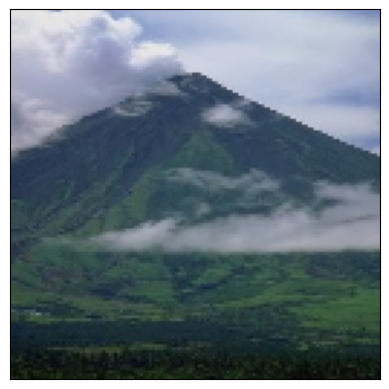

In [34]:
query_image = images[0]
query_image = cv2.resize(query_image, (128, 128))
plt.imshow(query_image)
plt.xticks([])
plt.yticks([])

In [27]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_and_preprocess_images(dataset_path):
    images = []
    sorted_img_files = sorted(os.listdir(dataset_path), key=lambda x: int(x.split('.')[0].split('_')[1]))
    for img_file in sorted_img_files:
        img = cv2.imread(os.path.join(dataset_path, img_file))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return np.array(images)

# Loading the dataset
dataset_path = 'jpg'  # Make sure to update this path
images = load_and_preprocess_images(dataset_path)

# Function to assign labels
def assign_labels(num_images=1360, images_per_category=80):
    labels = [i // images_per_category for i in range(num_images)]
    return labels

# Assigning labels
labels = assign_labels()

# Shuffle the dataset and labels together
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = np.array(labels)[indices]

# Display the shape of the loaded dataset
print(f"Loaded {len(images)} images, each of shape: {images[0].shape}")

# Display first few labels to confirm shuffling
print("First few labels after shuffling:", labels[:10])

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)


Loaded 1360 images, each of shape: (128, 128, 3)
First few labels after shuffling: [12 10 11 15  1  4  9  1 15  0]


([], [])

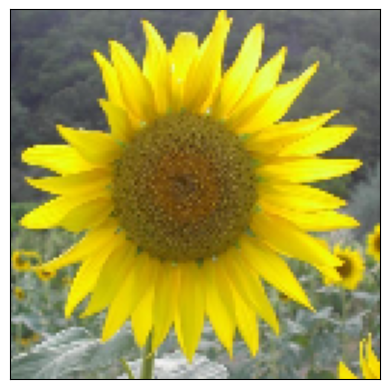

In [3]:
query_image = images[1]
query_image = cv2.resize(query_image, (128, 128))
plt.imshow(query_image)
plt.xticks([])
plt.yticks([])

In the next sections, we will build upon this foundation to implement the feature extraction and retrieval components of our CBIR system.

---


# Task 1: Building the CBIR System

## Overview of Task 1 Requirements

In Task 1, our objective is to build the foundational structure of the Content-Based Image Retrieval (CBIR) system. This involves implementing the key components of the system, which includes loading images from the dataset, extracting color features, computing distances for similarity measurement, and ranking the results based on similarity scores.

### Key Components to Implement:
1. **Feature Extraction:** Implement methods to extract color features (histograms or moments) from the images.
2. **Similarity Measurement:** Develop a function to measure the similarity between the feature vectors of the query image and the images in the dataset.
3. **Image Retrieval:** Retrieve and rank images based on their similarity scores.
4. **Result Display:** Display the retrieved images in order of their relevance to the query image.

The goal is to create a system that can take a query image and return a set of images that are visually similar to the query, primarily based on color features.

## Implementation of System Architecture

In the following code cell, we will implement the core components of the CBIR system.



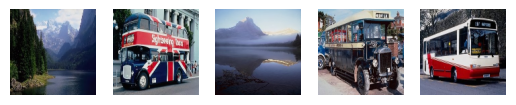

In [5]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
# Assume 'images' is the array of preprocessed images loaded from the dataset

# Feature Extraction Function
def extract_color_features(images):
    # Example: Extract color histograms
    features = []
    for img in images:
        hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features)

# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]
    return images[ranked_indices]

# Load query image and preprocess (similar to dataset images)
query_index = 1
query_image = images[query_index]
# query_image = cv2.imread('x.jpg')
query_image = cv2.resize(query_image, (128, 128))
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)
for i, img in enumerate(top_k_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

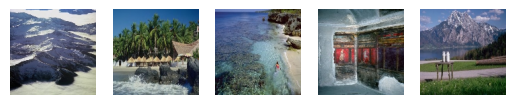

In [47]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
# Assume 'images' is the array of preprocessed images loaded from the dataset

# Feature Extraction Function
def extract_color_features(images):
    features = []
    for img in images:
        # Calculate histograms for each channel separately
        hists = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64) 



# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]
    return images[ranked_indices]

# Load query image and preprocess (similar to dataset images)
query_index = 5
query_image = images[query_index]
# query_image = cv2.imread('x.jpg')
query_image = cv2.resize(query_image, (128, 128))
query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)
for i, img in enumerate(top_k_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

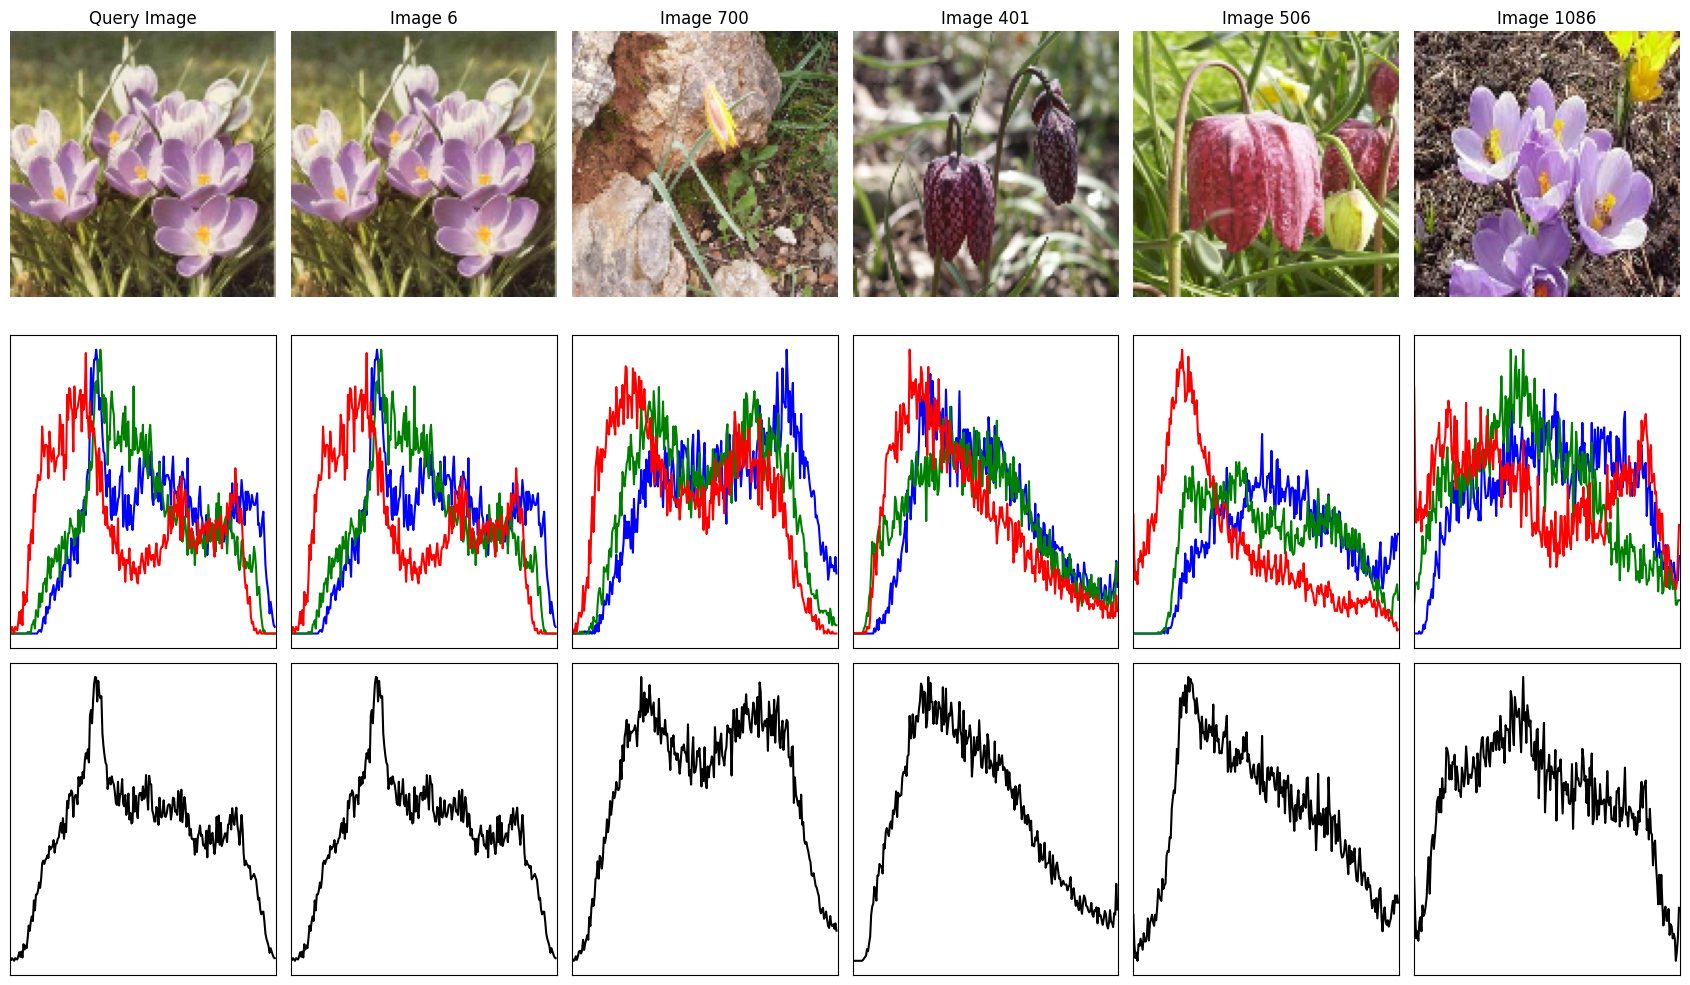

In [4]:
import numpy as np
import cv2
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def plot_combined_histogram(ax, image):
    # Compute histograms for each channel
    hists = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    # Combine histograms
    combined_hist = np.sum(hists, axis=0) 
    ax.plot(combined_hist, color='black')
    ax.set_xlim([0, 256])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    
# Feature Extraction Function
def extract_color_features(images):
    features = []
    for img in images:
        # Calculate histograms for each channel separately
        hists = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
        # Flatten and concatenate histograms
        hist = np.concatenate([h.flatten() for h in hists])
        # Normalize histogram
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features, dtype=np.float64)

# Similarity Measurement Function
def compute_similarity(feature_vector, query_vector):
    # Using Euclidean distance for similarity
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Helper Function to Plot Histograms
def plot_histograms(ax, image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(hist, color=col)
        ax.set_xlim([0, 256])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)


# Image Retrieval and Ranking Function
def retrieve_images(query_image, images, top_k=5):
    query_feature = extract_color_features([query_image])
    all_features = extract_color_features(images)
    distances = compute_similarity(all_features, query_feature)
    ranked_indices = np.argsort(distances.ravel())[:top_k]

    fig, axes = plt.subplots(3, top_k+1, figsize=(17, 10))

    # Display and plot histogram for the query image
    axes[0, 0].imshow(query_image)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Query Image")
    plot_histograms(axes[1, 0], query_image)
    plot_combined_histogram(axes[2, 0], query_image)

    # Display and plot histograms for the retrieved images
    for i, index in enumerate(ranked_indices):
        img = images[index]
        axes[0, i + 1].imshow(img)
        axes[0, i + 1].axis('off')
        axes[0, i + 1].set_title(f"Image {index + 1}")
        plot_histograms(axes[1, i + 1], img)
        plot_combined_histogram(axes[2, i + 1], img)


    plt.tight_layout()
    plt.show()


# Load and preprocess dataset images and query image
# Assume 'images' is the array of preprocessed images loaded from the dataset
query_index = 5
query_image = images[query_index]
query_image = cv2.resize(query_image, (128, 128))

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)


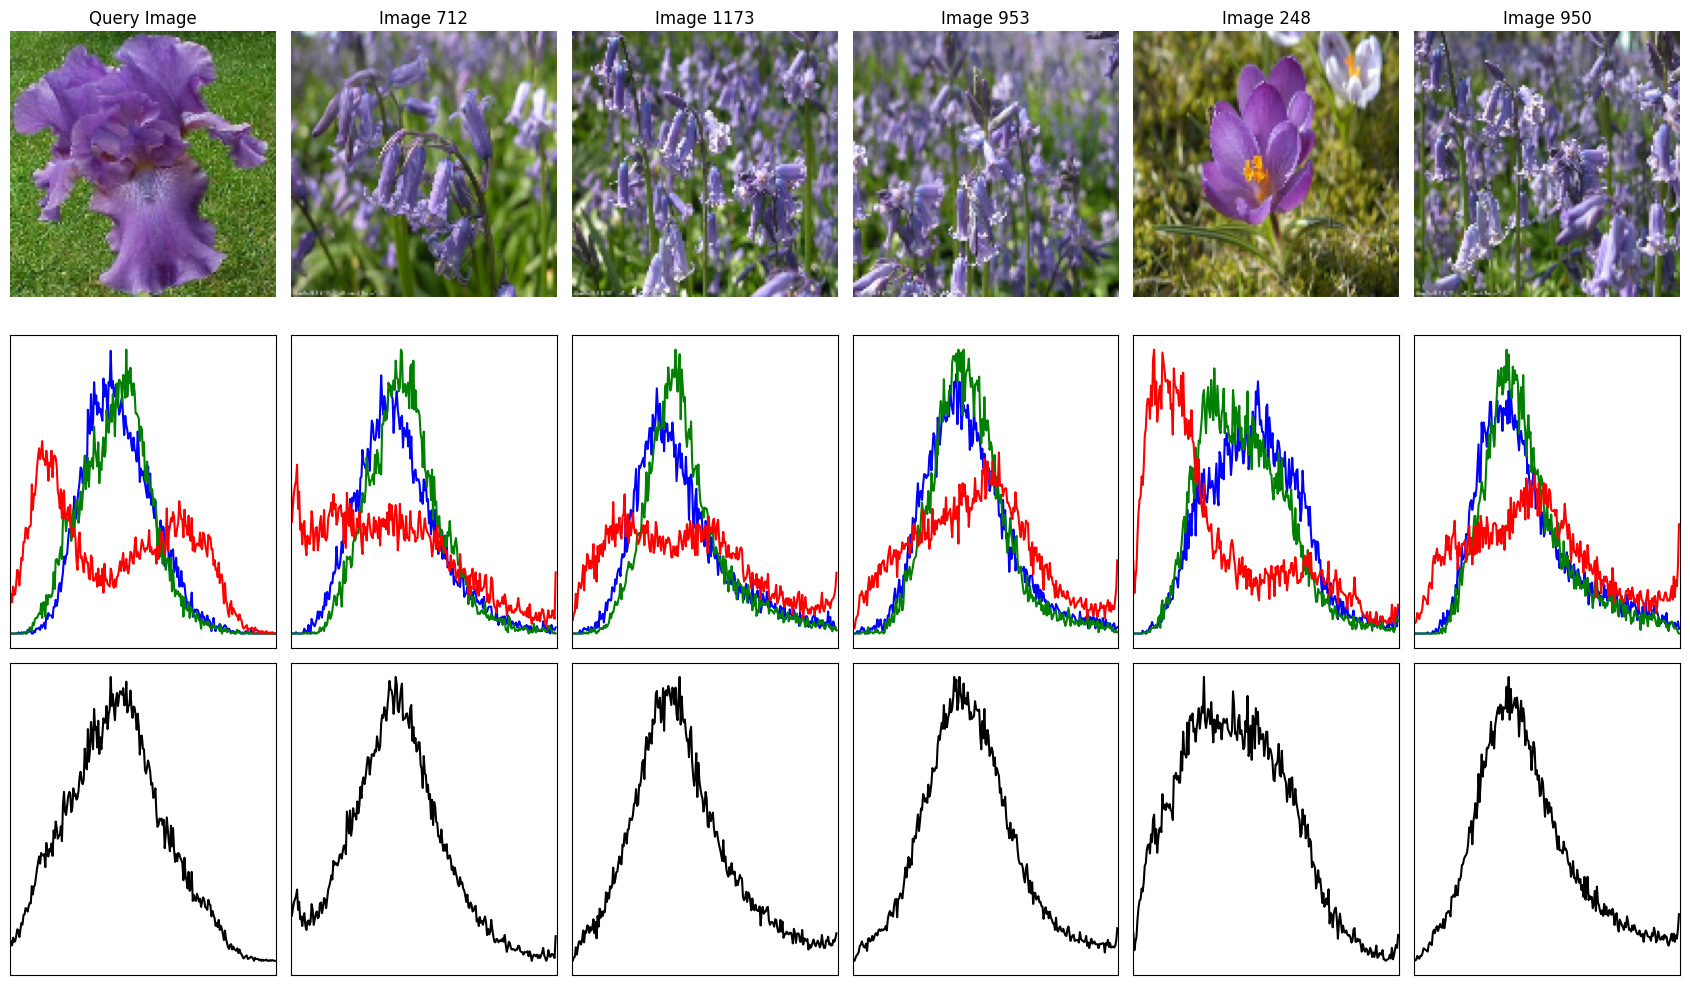

In [47]:
import numpy as np
import cv2
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def plot_combined_histogram(ax, image):
    # Compute histograms for each channel
    hists = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
    # Combine histograms
    combined_hist = np.sum(hists, axis=0)
    ax.plot(combined_hist, color='black')
    ax.set_xlim([0, 256])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)



def retrieve_images(query_image, images, top_k=5):
    # Extract features from the query image
    query_feature = extract_color_features([query_image])

    # Remove the query image from the image list if it exists
    images_without_query = [img for img in images if not np.array_equal(img, query_image)]

    # Extract features from the remaining images
    all_features = extract_color_features(images_without_query)

    # Compute similarities
    distances = compute_similarity(all_features, query_feature)

    # Get top K similar images
    ranked_indices = np.argsort(distances.ravel())[:top_k]

    fig, axes = plt.subplots(3, top_k+1, figsize=(17, 10))

    # Display and plot histogram for the query image
    axes[0, 0].imshow(query_image)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Query Image")
    plot_histograms(axes[1, 0], query_image)
    plot_combined_histogram(axes[2, 0], query_image)

    # Display and plot histograms for the retrieved images
    for i, index in enumerate(ranked_indices):
        img = images_without_query[index]
        axes[0, i + 1].imshow(img)
        axes[0, i + 1].axis('off')
        axes[0, i + 1].set_title(f"Image {index + 1}")
        plot_histograms(axes[1, i + 1], img)
        plot_combined_histogram(axes[2, i + 1], img)

    plt.tight_layout()
    plt.show()

# Load and preprocess dataset images and query image
# Assume 'images' is the array of preprocessed images loaded from the dataset
query_index = 5
query_image = images[query_index]
query_image = cv2.resize(query_image, (128, 128))

# Retrieve and display top K similar images
top_k_images = retrieve_images(query_image, images, top_k=5)



This code implements the basic structure of the CBIR system, from feature extraction to displaying the retrieved images. It's a starting point, and further optimization and refinement can be applied based on the system's performance and specific requirements of the dataset.

---

# Task 2: Color Histogram Implementation and Analysis

## Explanation of Color Histogram Feature and Task 2 Objectives

A color histogram represents the frequency of occurrence of various color values present in an image. It is a powerful visual descriptor that can be used to compare images based on their color content. The histogram essentially breaks down the image into a finite number of bins, with each bin corresponding to a range of color values. The number of pixels falling within each bin gives us the histogram count.

In Task 2, we aim to implement a Content-Based Image Retrieval (CBIR) system that uses color histograms as the image representation method. We will conduct experiments with histograms of different bin sizes—specifically, 120 bins, 180 bins, and 360 bins—to understand the impact of bin size on the retrieval performance. We will use the Euclidean distance as the measure of similarity between histograms.

The objectives for this task are:
- To implement the CBIR system using color histograms with the specified bin sizes.
- To evaluate the system by calculating performance metrics such as precision, recall, F1 score, and computation time.
- To construct a Receiver Operating Characteristic (ROC) curve by varying the retrieval threshold and calculate the Area Under Curve (AUC) for a comprehensive performance measure.

These performance metrics will be computed as averages over at least 10 different queries to ensure a robust evaluation of the system.

## Implementation of CBIR Using Color Histogram with Different Bins

In the code cells below, we will implement the CBIR system using color histograms as image features and compute the necessary performance metrics.


---

---

Testing with 120 bins...
Testing with 180 bins...
Testing with 256 bins...


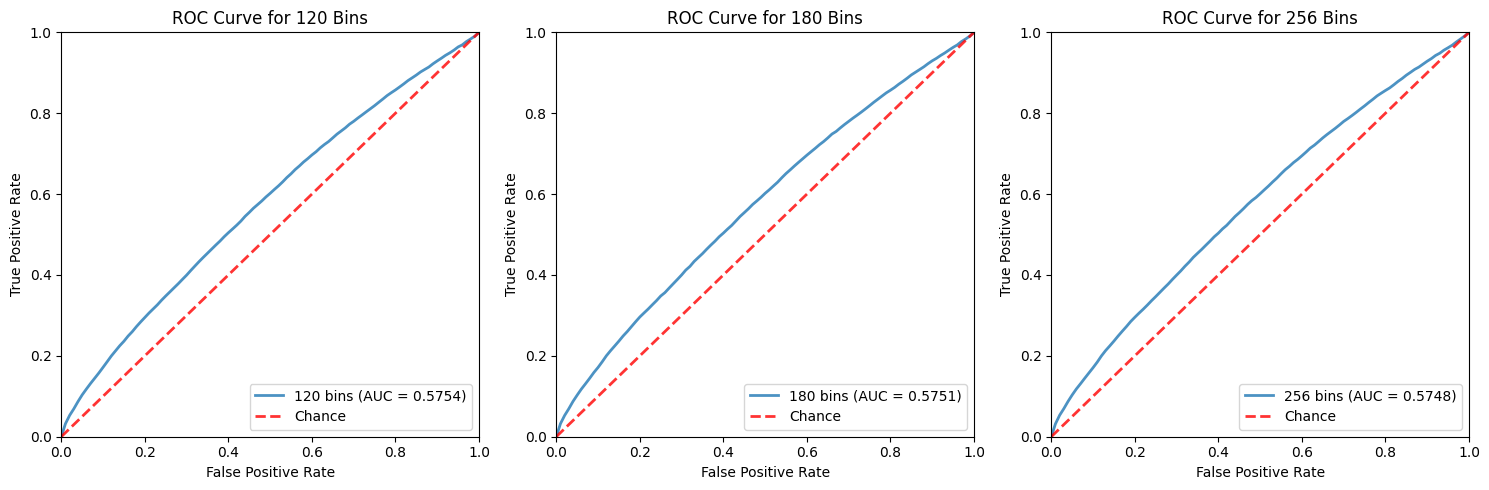

,Bins,Precision,Recall,F1 Score,Time (seconds)
0,120,0.124224,0.499651,0.165436,1.944070
1,180,0.123773,0.506477,0.165476,2.086094
2,256,0.122539,0.505940,0.165208,2.150239


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances, roc_curve, auc, precision_recall_curve, f1_score
from numpy import interp
import time

# Function to compute similarity using Euclidean distance
def compute_similarity(feature_vector, query_vector):
    distances = pairwise_distances(feature_vector, query_vector, metric='euclidean')
    return distances

# Function to compute ROC values
def compute_roc_values(distances, true_labels):
    fpr, tpr, thresholds = roc_curve(true_labels, 1/distances, pos_label=1)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Function to compute color histogram with a specified number of bins
def compute_histogram(image, bins):
    hists = [cv2.calcHist([image], [i], None, [bins], [0, 256]) for i in range(3)]
    hist = np.concatenate([h.flatten() for h in hists])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function to extract features with different histogram bin sizes
def extract_features_with_bins(images, bins):
    features = [compute_histogram(img, bins) for img in images]
    return np.array(features)

# Function to plot ROC and compute AUC
def plot_roc_auc(mean_tpr, mean_auc, bins):
    plt.figure()
    plt.plot(base_fpr, mean_tpr, label=f'{bins} bins (AUC = {mean_auc:.4f})', lw=2, alpha=0.8)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {bins} Bins')
    plt.legend(loc="lower right")
    plt.show()
    
def compute_precision_recall_f1(distances, true_labels):
    precision, recall, thresholds = precision_recall_curve(true_labels, 1/distances)
    f1_scores = 2 * (precision * recall) / (np.maximum(precision + recall, np.finfo(float).eps))
    
    best_threshold_index = np.argmax(f1_scores)
    best_f1_score = f1_scores[best_threshold_index]
    best_precision = precision[best_threshold_index]
    best_recall = recall[best_threshold_index]

    return best_precision, best_recall, best_f1_score



# Experiment with different bin sizes
bins_options = [120, 180, 256]
num_queries = len(test_images)
base_fpr = np.linspace(0, 1, 101)

# Placeholder for experimental results
results = {bins: {"tprs": [], "aucs": [], "precision": [], "recall": [], "f1_score": [], "times": []} for bins in bins_options}

for bins in bins_options:
    print(f"Testing with {bins} bins...")
    start_time = time.time()
    train_features = extract_features_with_bins(train_images, bins)

    for query_index in range(num_queries):
        query_image = test_images[query_index]
        query_feature = compute_histogram(query_image, bins)
        distances = compute_similarity(train_features, [query_feature]).flatten()

        binary_true_labels = (train_labels == test_labels[query_index]).astype(int)
        fpr, tpr, roc_auc = compute_roc_values(distances, binary_true_labels)
        precision, recall, f1 = compute_precision_recall_f1(distances, binary_true_labels)

        # Interpolation and storing metrics
        tpr_interp = interp(base_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        results[bins]["tprs"].append(tpr_interp)
        results[bins]["aucs"].append(roc_auc)
        results[bins]["precision"].append(precision)
        results[bins]["recall"].append(recall)
        results[bins]["f1_score"].append(f1)

    elapsed_time = time.time() - start_time
    results[bins]["times"].append(elapsed_time)


import pandas as pd
fig, axes = plt.subplots(1, len(bins_options), figsize=(15, 5))  # Adjust the figure size as needed

# List to store the results
results_list = []

# Plotting the ROC curves and accumulating metrics in the list
for i, (bins, data) in enumerate(results.items()):
    mean_tpr = np.mean(data["tprs"], axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(base_fpr, mean_tpr)

    ax = axes[i]
    ax.plot(base_fpr, mean_tpr, label=f'{bins} bins (AUC = {mean_auc:.4f})', lw=2, alpha=0.8)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {bins} Bins')
    ax.legend(loc="lower right")

    avg_precision = np.mean(data["precision"])
    avg_recall = np.mean(data["recall"])
    avg_f1_score = np.mean(data["f1_score"])
    avg_time = np.mean(data["times"])

    # Appending the results to the list
    results_list.append({'Bins': bins, 
                         'Precision': avg_precision, 
                         'Recall': avg_recall, 
                         'F1 Score': avg_f1_score, 
                         'Time (seconds)': avg_time})

plt.tight_layout()
plt.show()

# Creating a DataFrame from the list
results_df = pd.DataFrame(results_list)

# Displaying the results table
results_df


---

### Code Cell: CBIR Implementation Using Color Histograms

### Code Cell: Experimentation and Performance Metrics Calculation

1. Choose a query image.
2. Retrieve its nearest neighbors based on the color histogram.
3. Assume the top-n nearest neighbors of the query image (excluding the query image itself) are the "relevant" images.
4. For each test, retrieve images using different bin sizes and measure how many of the top-n nearest neighbors are included in the retrieved set

### Code Cell: ROC Curve and AUC Calculation


## Analysis of Results

In this section, we would analyze the results of the experiments. We would look at how the bin size affects the precision, recall, and F1 score. We would also discuss the computation time and its implications on the scalability of the CBIR system. Furthermore, we would interpret the ROC curve and AUC results, giving us insight into the overall performance of the system across different threshold settings.

---

# Task 3
### Task 3.1: CBIR System Using Color Moments

In [29]:
from scipy.stats import skew

def compute_color_moments(image):
    # Convert image to float type for moment calculation
    image = image.astype('float32')
    color_moments = []
    for i in range(3):  # Iterate over the three channels
        channel = image[:,:,i]
        mean = np.mean(channel)
        std = np.std(channel)
        skw = skew(channel.ravel())
        color_moments.extend([mean, std, skw])
    return np.array(color_moments)

def extract_color_moments(images):
    features = [compute_color_moments(img) for img in images]
    return np.array(features)



In [31]:
def run_cbir_system_color_moments(train_images, test_images, train_labels, test_labels):
    # Step 1: Extract color moments for training and test images
    print("Extracting color moments for training and test images...")
    start_time = time.time()
    train_features_cm = extract_color_moments(train_images)
    test_features_cm = extract_color_moments(test_images)
    extraction_time = time.time() - start_time
    print(f"Feature extraction completed in {extraction_time:.2f} seconds.")

    # Step 2: Evaluate the CBIR system for each test query
    num_queries = len(test_images)
    base_fpr = np.linspace(0, 1, 101)
    tprs = []
    aucs = []
    precisions = []
    recalls = []
    f1_scores = []
    query_times = []

    for query_index in range(num_queries):
        query_image = test_images[query_index]
        query_feature = compute_color_moments(query_image)

        # Compute the similarity (distance)
        start_time = time.time()
        distances = compute_similarity(train_features_cm, [query_feature]).flatten()
        query_time = time.time() - start_time
        query_times.append(query_time)

        # Compute the true labels for ROC
        binary_true_labels = (train_labels == test_labels[query_index]).astype(int)

        # Compute ROC values and precision-recall-F1
        fpr, tpr, roc_auc = compute_roc_values(distances, binary_true_labels)
        precision, recall, f1 = compute_precision_recall_f1(distances, binary_true_labels)

        # Interpolation for ROC
        tpr_interp = interp(base_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)
        aucs.append(roc_auc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Step 3: Calculate the average metrics
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(base_fpr, mean_tpr)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1_score = np.mean(f1_scores)
    avg_query_time = np.mean(query_times)

    # Step 4: Display the results
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1_score:.4f}")
    print(f"Average Query Time: {avg_query_time:.4f} seconds")
    print(f"Average AUC: {mean_auc:.4f}")

    # Step 5: Plot the ROC Curve
    plt.figure()
    plt.plot(base_fpr, mean_tpr, label=f'Color Moments (AUC = {mean_auc:.4f})', lw=2, alpha=0.8)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Color Moments')
    plt.legend(loc="lower right")
    plt.show()


Extracting color moments for training and test images...
Feature extraction completed in 2.10 seconds.
Average Precision: 0.1524
Average Recall: 0.4851
Average F1 Score: 0.1970
Average Query Time: 0.0006 seconds
Average AUC: 0.6255


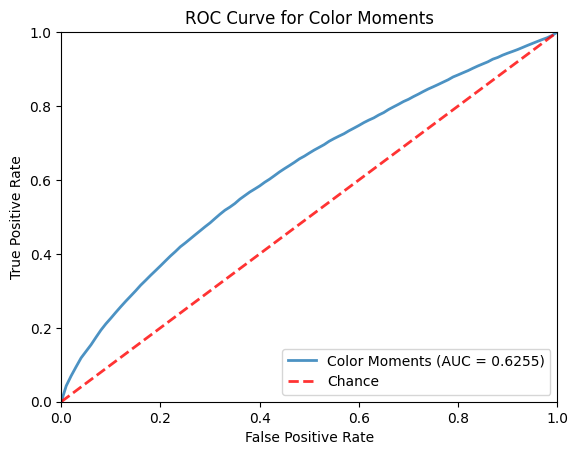

In [32]:
train_features_cm = extract_color_moments(train_images)
test_features_cm = extract_color_moments(test_images)

run_cbir_system_color_moments(train_images, test_images, train_labels, test_labels)

---

Precision: 0.0400
Recall: 0.2000
F1_score: 0.0667
Time: 0.0013


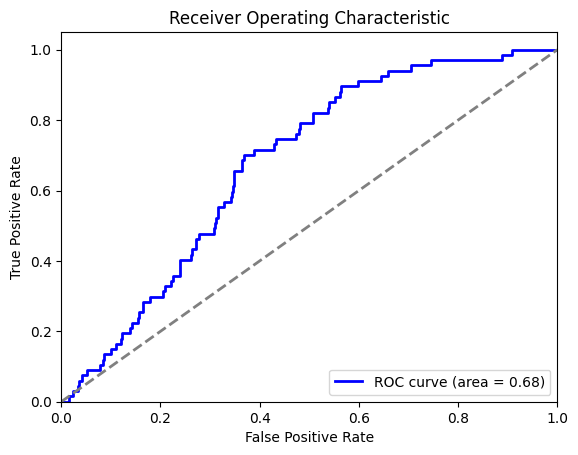

In [26]:
import numpy as np
import cv2
from scipy.stats import skew
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to compute color moments
def compute_color_moments(image):
    moments = []
    for channel in cv2.split(image):
        moments.extend([np.mean(channel), np.std(channel), skew(channel.flatten())])
    return np.array(moments)

# Extracting color moments for all images
def extract_color_moments(images):
    return np.array([compute_color_moments(img) for img in images])

# Function to compute similarity (Euclidean distance)
def compute_similarity(feature_vector, query_vector):
    distances = np.linalg.norm(feature_vector - query_vector, axis=1)
    return distances

# Function to retrieve the top K closest images
def retrieve_top_k_images(distances, k=5):
    top_k_indices = np.argsort(distances)[:k]
    top_k_labels = [labels[index] for index in top_k_indices]
    return top_k_labels

# Function to compute evaluation metrics
def compute_metrics_per_query(relevant_retrieved, num_relevant):
    true_positives = sum(relevant_retrieved)
    false_positives = len(relevant_retrieved) - true_positives
    false_negatives = num_relevant - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fscore = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, fscore

# Function to compute ROC values
def compute_roc_values(distances, true_labels):
    fpr, tpr, thresholds = roc_curve(true_labels, distances, pos_label=1)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Function to plot ROC and compute AUC
def plot_roc_auc(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Load your dataset here
# images, labels = load_your_dataset()

# Split the dataset into training and testing
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

# Extracting color moments for training and testing images
train_features = extract_color_moments(train_images)
test_features = extract_color_moments(test_images)

# Placeholder for experimental results
results = {"precision": [], "recall": [], "f1_score": [], "time": []}

num_queries = 10  # Adjust as needed
top_k = 5  # Number of images to retrieve

for query_index in range(num_queries):
    query_image = test_images[query_index]
    true_label = test_labels[query_index]

    start_time = time.time()
    query_feature = compute_color_moments(query_image)
    distances = compute_similarity(train_features, query_feature)
    end_time = time.time()

    retrieved_labels = retrieve_top_k_images(distances, top_k)
    relevant_retrieved = [label == true_label for label in retrieved_labels]
    num_relevant_retrieved = sum(relevant_retrieved)

    precision, recall, fscore = compute_metrics_per_query(relevant_retrieved, num_relevant_retrieved)

    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1_score"].append(fscore)
    results["time"].append(end_time - start_time)

# Average results over all queries
for metric in results:
    results[metric] = np.mean(results[metric])

# Display final averaged results
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Compute and plot ROC curve and AUC for one example query
binary_true_labels = (train_labels == test_labels[0]).astype(int)
fpr, tpr, roc_auc = compute_roc_values(distances, binary_true_labels)
plot_roc_auc(fpr, tpr, roc_auc)


Precision: 0.0600
Recall: 0.3000
F1_score: 0.1000
Time: 0.0017


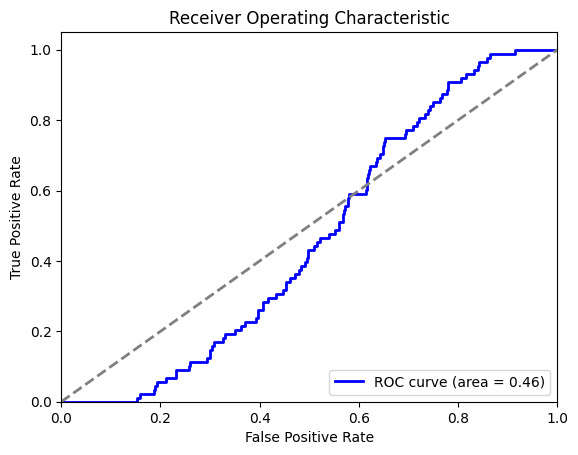

In [76]:
# task 3.2
# Function to compute color moments with weights
def compute_color_moments_with_weights(image, weights):
    moments = []
    for channel in cv2.split(image):
        mean, std, skewness = np.mean(channel), np.std(channel), skew(channel.flatten())
        weighted_moments = [mean * weights[0], std * weights[1], skewness * weights[2]]
        moments.extend(weighted_moments)
    return np.array(moments)

# Example weights for mean, standard deviation, and skewness
weights = [0.3, 0.5, 0.2]  # Adjust these weights as per your requirement

# Extracting color moments with weights for all images
def extract_color_moments_with_weights(images, weights):
    return np.array([compute_color_moments_with_weights(img, weights) for img in images])

# Computing color moments with weights for training and testing images
train_features = extract_color_moments_with_weights(train_images, weights)
test_features = extract_color_moments_with_weights(test_images, weights)



# Placeholder for experimental results
results = {"precision": [], "recall": [], "f1_score": [], "time": []}

num_queries = 10  # Adjust as needed
top_k = 5  # Number of images to retrieve

for query_index in range(num_queries):
    query_image = test_images[query_index]
    true_label = test_labels[query_index]

    start_time = time.time()
    query_feature = compute_color_moments_with_weights(query_image, weights)  # Use weighted moments here
    distances = compute_similarity(train_features, query_feature.reshape(1, -1))  # Reshaping query_feature to 2D
    end_time = time.time()

    retrieved_labels = retrieve_top_k_images(distances, top_k)
    relevant_retrieved = [label == true_label for label in retrieved_labels]
    num_relevant_retrieved = sum(relevant_retrieved)

    precision, recall, fscore = compute_metrics_per_query(relevant_retrieved, num_relevant_retrieved)

    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1_score"].append(fscore)
    results["time"].append(end_time - start_time)



# Average results over all queries
for metric in results:
    results[metric] = np.mean(results[metric])

# Display final averaged results
for metric, value in results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Compute and plot ROC curve and AUC for one example query
binary_true_labels = (train_labels == test_labels[0]).astype(int)
fpr, tpr, roc_auc = compute_roc_values(distances, binary_true_labels)
plot_roc_auc(fpr, tpr, roc_auc)

Precision (Extended): 0.0600
Recall (Extended): 0.3000
F1_score (Extended): 0.1000
Time (Extended): 0.0111


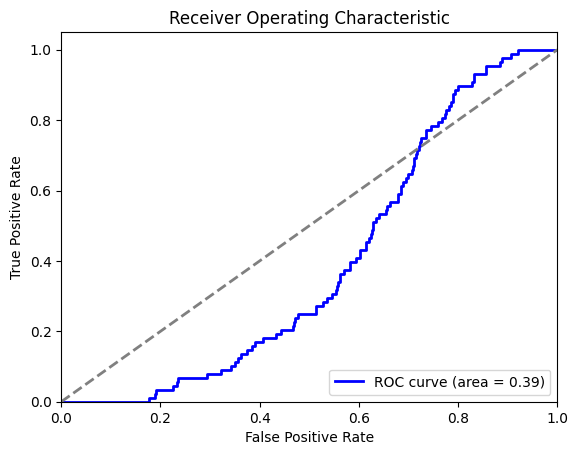

In [82]:
# task3.3 
from scipy.stats import mode, kurtosis

def compute_extended_color_moments(image, weights):
    moments = []
    for channel in cv2.split(image):
        channel_flat = channel.flatten()
        mean = np.mean(channel)
        std = np.std(channel)
        skewness = skew(channel_flat)
        median = np.median(channel)

        # Handling mode with try-except
        try:
            mode_val = mode(channel_flat).mode[0]
        except IndexError:
            mode_val = 0

        kurt = kurtosis(channel_flat)
        weighted_moments = [
            mean * weights[0], 
            std * weights[1], 
            skewness * weights[2], 
            median * weights[3], 
            mode_val * weights[4], 
            kurt * weights[5]
        ]
        moments.extend(weighted_moments)
    return np.array(moments)




# Updated weights for Mean, Standard Deviation, Skewness, Median, Mode, and Kurtosis
weights_extended = [0.2, 0.2, 0.15, 0.15, 0.15, 0.15]  # Adjust these weights as per your requirement

# Extracting extended color moments with weights for all images
def extract_extended_color_moments_with_weights(images, weights):
    return np.array([compute_extended_color_moments(img, weights) for img in images])

# Computing extended color moments with weights for training and testing images
train_features_extended = extract_extended_color_moments_with_weights(train_images, weights_extended)
test_features_extended = extract_extended_color_moments_with_weights(test_images, weights_extended)

# Evaluation loop (similar to Task 3.2 but using the extended features and weights)
results_extended = {"precision": [], "recall": [], "f1_score": [], "time": []}

for query_index in range(num_queries):
    query_image = test_images[query_index]
    true_label = test_labels[query_index]

    start_time = time.time()
    query_feature = compute_extended_color_moments(query_image, weights_extended)
    distances = compute_similarity(train_features_extended, query_feature.reshape(1, -1))
    end_time = time.time()

    retrieved_labels = retrieve_top_k_images(distances, top_k)
    relevant_retrieved = [label == true_label for label in retrieved_labels]
    num_relevant_retrieved = sum(relevant_retrieved)

    precision, recall, fscore = compute_metrics_per_query(relevant_retrieved, num_relevant_retrieved)

    results_extended["precision"].append(precision)
    results_extended["recall"].append(recall)
    results_extended["f1_score"].append(fscore)
    results_extended["time"].append(end_time - start_time)

# Average and display results
# Average and display results
for metric, values in results_extended.items():
    average_value = np.mean(values)  # Calculate the mean of the values
    print(f"{metric.capitalize()} (Extended): {average_value:.4f}")


# Compute and plot ROC curve and AUC for one example query
binary_true_labels = (train_labels == test_labels[0]).astype(int)
fpr, tpr, roc_auc = compute_roc_values(distances, binary_true_labels)
plot_roc_auc(fpr, tpr, roc_auc)


---

8. **Task 4: Additional Image Representation Techniques**
    - _Text Cell:_ Overview of Task 4 and exploration of additional image representation techniques.
    - _Code Cell:_ Implementation and experimentation.
    - _Text Cell:_ Analysis of results.

9. **Experimental Setup and Results**
    - _Text Cell:_ Describe the evaluation methodology, datasets used, and experimental setup.
    - _Text Cell:_ Presentation and analysis of overall results, comparing different color features.

10. **Discussion and Limitations**
    - _Text Cell:_ Discuss the effectiveness and limitations of the implemented CBIR system.

11. **Conclusion and Future Work**
    - _Text Cell:_ Summarize key findings, the effectiveness of color features in CBIR, and insights for future research.

12. **References**
    - _Text Cell:_ List any references or sources used.